## Projeto Predição de Insuficiência Cardiaca

https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction

### Informações de atributo
- Idade: idade do paciente [anos]
- Sexo: sexo do paciente [M: Masculino, F: Feminino]
- ChestPainType: tipo de dor no peito [TA: Angina Típica, ATA: Angina Atípica, NAP: Dor Não Anginosa, ASY: Assintomática]
- PA de repouso: pressão arterial de repouso [mm Hg]
- Colesterol: colesterol sérico [mm/dl]
- FastingBS: glicemia em jejum [1: se FastingBS > 120 mg/dl, 0: caso contrário]
- ECG de repouso: resultados do eletrocardiograma de repouso [Normal: normal, ST: com anormalidade da onda ST-T (inversões da onda T e/ou elevação ou depressão do ST > 0,05 mV), HVE: mostrando provável ou definitiva hipertrofia ventricular esquerda pelos critérios de Estes]
- MaxHR: frequência cardíaca máxima alcançada [Valor numérico entre 60 e 202]
- ExercícioAngina: angina induzida por exercício [S: Sim, N: Não]
- Pico antigo: pico antigo = ST [Valor numérico medido em depressão]
- ST_Slope: a inclinação do segmento ST do exercício de pico [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: classe de saída [1: doença cardíaca, 0: normal]

# Extração

In [64]:
# %pip install plotly

In [65]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay


heart_df = pd.read_csv('./dataset/heart.csv', sep=',')
heart_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [66]:
columns = {
    'Age': 'Idade',
    'Sex': 'Sexo', 
    'ChestPainType': 'Tipo_Dor_Peito', 
    'RestingBP': 'RepousoPA', 
    'Cholesterol': 'Colesterol', 
    'FastingBS': 'FastingBS',
    'RestingECG': 'RestingECG', 
    'MaxHR': 'Frequencia_Cardiaca_Max', 
    'ExerciseAngina': 'Exercicio_Angina', 
    'Oldpeak': 'Pico_Antigo', 
    'ST_Slope': 'ST_Slope',
    'HeartDisease': 'Doenca_Cardiaca'
}

heart_df = heart_df.rename(columns=columns)
heart_df.head(5)

,Idade,Sexo,Tipo_Dor_Peito,RepousoPA,Colesterol,FastingBS,RestingECG,Frequencia_Cardiaca_Max,Exercicio_Angina,Pico_Antigo,ST_Slope,Doenca_Cardiaca
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


# Exploração

In [67]:
print('Colunas: %s' % heart_df.shape[1])
print('Linhas: %s' % heart_df.shape[0])

Colunas: 12
Linhas: 918


In [68]:
heart_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Idade,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RepousoPA,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Colesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
Frequencia_Cardiaca_Max,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Pico_Antigo,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
Doenca_Cardiaca,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [69]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Idade                    918 non-null    int64  
 1   Sexo                     918 non-null    object 
 2   Tipo_Dor_Peito           918 non-null    object 
 3   RepousoPA                918 non-null    int64  
 4   Colesterol               918 non-null    int64  
 5   FastingBS                918 non-null    int64  
 6   RestingECG               918 non-null    object 
 7   Frequencia_Cardiaca_Max  918 non-null    int64  
 8   Exercicio_Angina         918 non-null    object 
 9   Pico_Antigo              918 non-null    float64
 10  ST_Slope                 918 non-null    object 
 11  Doenca_Cardiaca          918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


- Calculando a quantidade de casos de pessoas com Insuficiência Cardiacas e sem Insuficiência Cardiacas.

paciente com Insuficiência Cardiacas: 508
paciente sem Insuficiência Cardiaca: 410


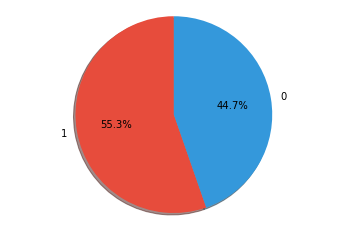

In [70]:
print("paciente com Insuficiência Cardiacas:", heart_df.query('Doenca_Cardiaca == 1').shape[0])
print("paciente sem Insuficiência Cardiaca:", heart_df.query('Doenca_Cardiaca == 0').shape[0])

labels = [1,0]
sizes = heart_df['Doenca_Cardiaca'].value_counts()
explode = (0, 0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',shadow=True, startangle=90 ,colors=['#E74C3C','#3498DB'])
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# heart_df['Doenca_Cardiaca'].value_counts().plot(kind="pie", autopct='%1.1f%%', figsize=(8,8) );

# Limpeza

Percebemos que não ha valores NaN em nosso DataSet. Como existem valores erroneos, podemos passar para o proximo passo da AED.

In [71]:
print(heart_df.notna().value_counts())

Idade  Sexo  Tipo_Dor_Peito  RepousoPA  Colesterol  FastingBS  RestingECG  Frequencia_Cardiaca_Max  Exercicio_Angina  Pico_Antigo  ST_Slope  Doenca_Cardiaca
True   True  True            True       True        True       True        True                     True              True         True      True               918
dtype: int64


# Discretização

Formar conjuntos de idade para classificação

In [72]:
print('Idade máxima: ',heart_df.Idade.max())
print('Idade MINIMA: ',heart_df.Idade.min())

Idade máxima:  77
Idade MINIMA:  28


In [73]:
# bins = [0,12,20,60,100]
# conjuto_idade = pd.cut(heart_df['Idade'].to_numpy(), bins=bins)

In [74]:
# heart_df['conjunto_idade'] = conjuto_idade

In [75]:
# heart_df['conjunto_idade'].value_counts()

In [76]:
heart_df

,Idade,Sexo,Tipo_Dor_Peito,RepousoPA,Colesterol,FastingBS,RestingECG,Frequencia_Cardiaca_Max,Exercicio_Angina,Pico_Antigo,ST_Slope,Doenca_Cardiaca
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


# Quais atributos tem relação?

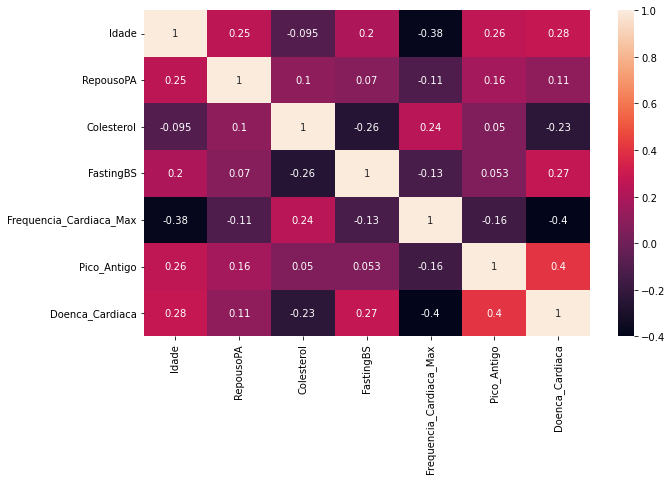

In [77]:
plt.figure(figsize=(10,6))

sns.heatmap(heart_df.corr(), annot=True)
plt.show()

Podemos ver que a Docença Cardiaca tem grande relação com uma "Frequência Cardiaca" alta e tambem uma relação com "Colesterol". Ha uma relação boa com "Pico Atingido","FastingBS" e "RepousoPA".

### Distribuição de Doença Cardiaca em relação aos sexo masculino e feminino

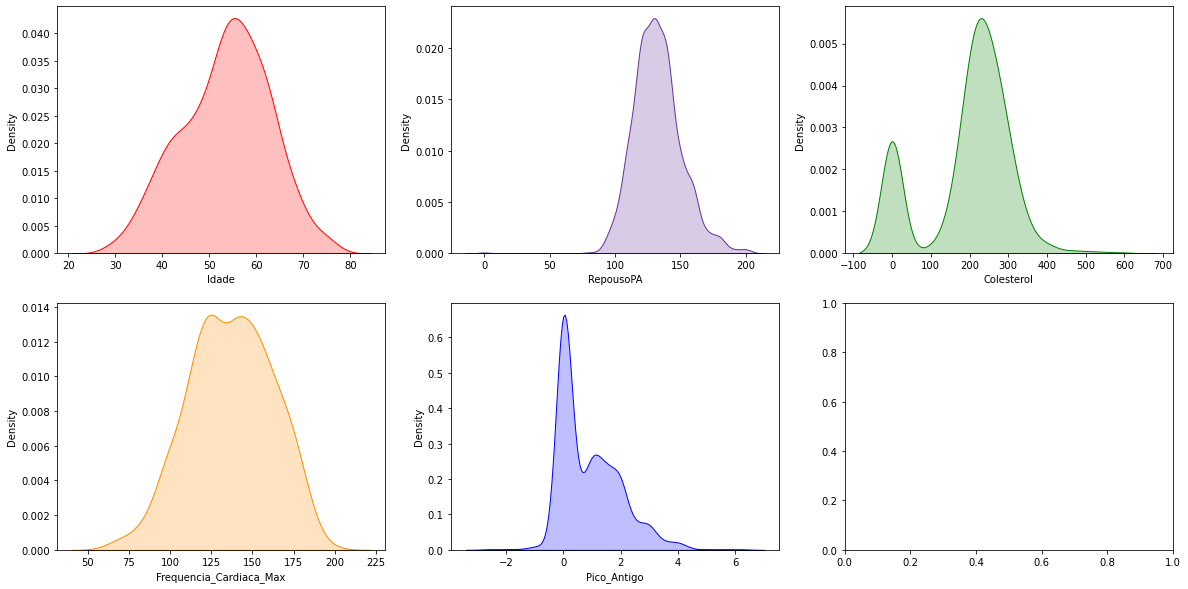

In [78]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
sns.kdeplot(heart_df['Idade'], ax = axes[0, 0] ,shade=True, color='r')
sns.kdeplot(heart_df['RepousoPA'], ax = axes[0, 1], shade=True, color='rebeccapurple')
sns.kdeplot(heart_df['Colesterol'], ax = axes[0, 2], shade=True, color='g')
sns.kdeplot(heart_df['Frequencia_Cardiaca_Max'], ax = axes[1, 0], shade=True, color='darkorange')
sns.kdeplot(heart_df['Pico_Antigo'], ax = axes[1, 1], shade=True, color='blue')
plt.show()

# Calculo de Insuficiência Cardiaca por Sexo

<AxesSubplot:xlabel='ST_Slope', ylabel='count'>

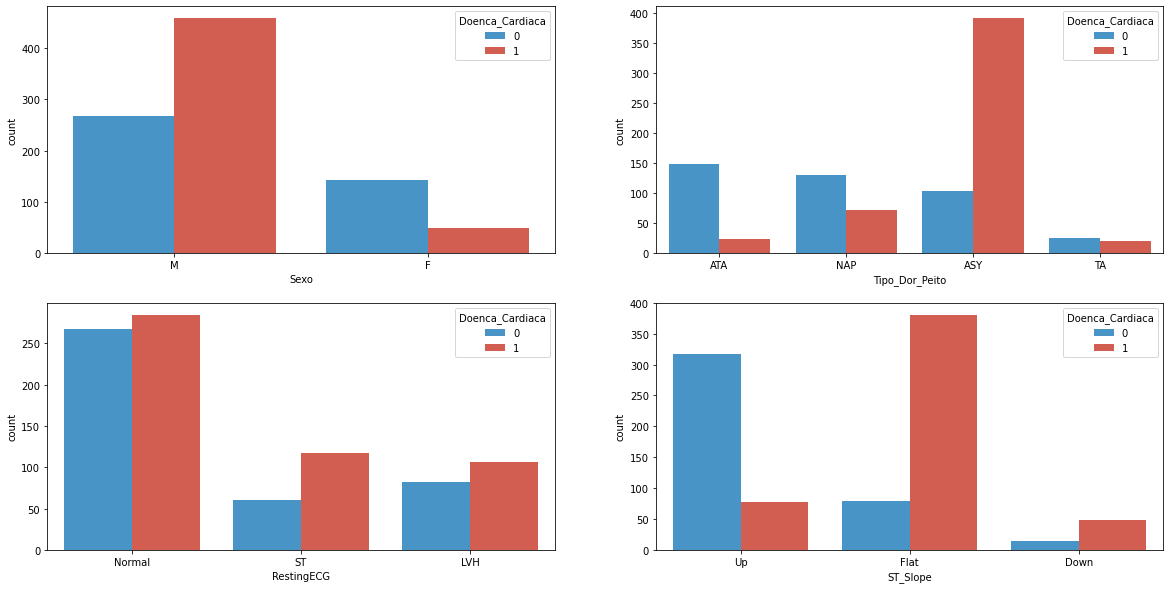

In [79]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

sns.countplot(x="Sexo", hue="Doenca_Cardiaca", data=heart_df, ax=axes[0, 0] ,palette=['#3498DB','#E74C3C'])
sns.countplot(x="Tipo_Dor_Peito", hue="Doenca_Cardiaca", data=heart_df, ax=axes[0, 1] ,palette=['#3498DB','#E74C3C'])
sns.countplot(x="RestingECG", hue="Doenca_Cardiaca", data=heart_df, ax=axes[1, 0] ,palette=['#3498DB','#E74C3C'])
sns.countplot(x="ST_Slope", hue="Doenca_Cardiaca", data=heart_df, ax=axes[1, 1] ,palette=['#3498DB','#E74C3C'])

# Desision Tree Train

- Apontamento de classe alvo 'y'

In [80]:
y = heart_df['Doenca_Cardiaca'].values
heart_df.drop(columns=['Doenca_Cardiaca'], inplace=True)

In [81]:
X = heart_df

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [83]:
for c in X_test.columns:
    if type(X_test[c].iloc[0]) == str:
        X_test[c] = X_test[c].astype('category')
        X_test[c] = X_test[c].cat.codes
        
for c in X_train.columns:
    if type(X_train[c].iloc[0]) == str:
        X_train[c] = X_train[c].astype('category')
        X_train[c] = X_train[c].cat.codes

- Criação do algoritmos de Arvore de Decisão.

É passado como critério que será utilizado o calculo de **ENTROPIA** para categorização dos dados

In [84]:
tree_view_train = DecisionTreeClassifier(random_state=0, max_depth=4)

# .fit é o comando de treinamento(lembre de fitness. o que treina)
model = tree_view_train.fit(X_train, y_train)
prediction_tree_train = model.predict(X_train)

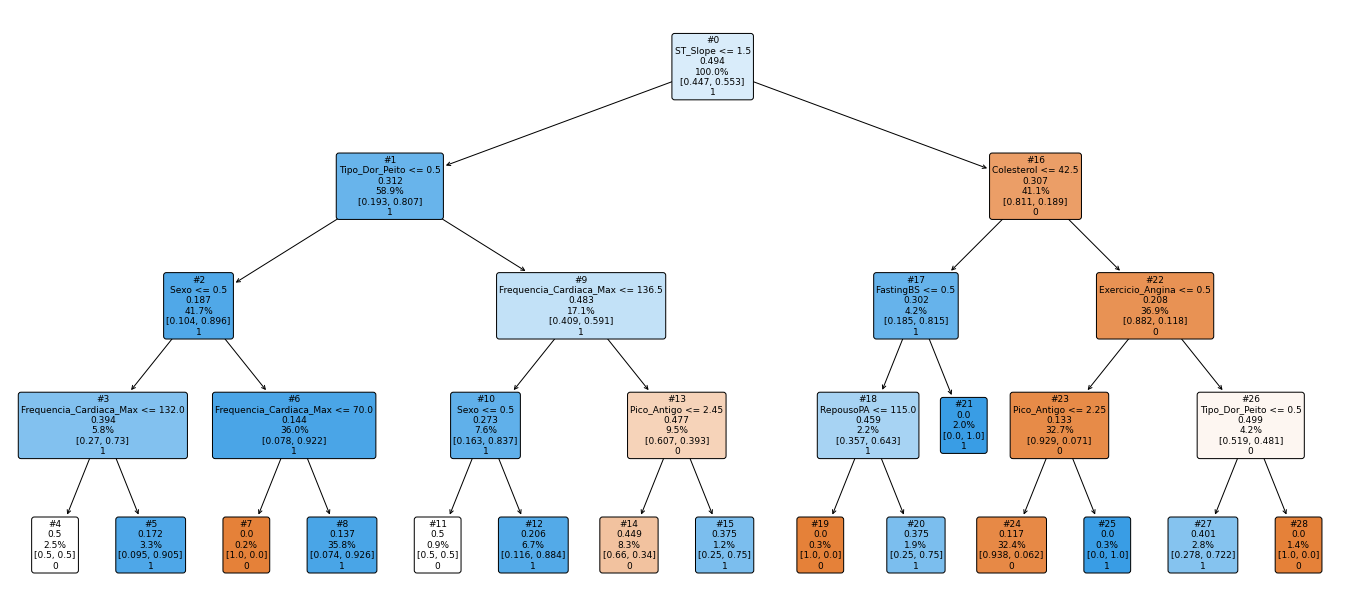

In [85]:
nome_features = X_train.columns

plt.figure(figsize=(24,11))

plt.title('treino')
tree.plot_tree(model, label=None, node_ids=True, rounded=True, fontsize=9, feature_names=nome_features, filled=True, class_names=['0','1'], proportion=True)
# plt.savefig('decision_tree.png', format='png')
plt.show()

In [86]:
accuracy = accuracy_score(y_test, prediction_tree)
print('Valor Acuracia: ',accuracy)
print(classification_report(y_test, prediction_tree))

Valor Acuracia:  0.8188405797101449
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       123
           1       0.87      0.79      0.83       153

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276



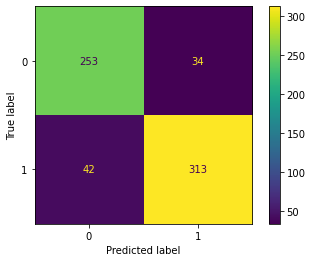

In [87]:
cm = confusion_matrix(y_train, prediction_tree_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Decision Tree Test

In [88]:
tree_view_test = DecisionTreeClassifier(random_state=0, max_depth=4)

prediction_tree = model.predict(X_test)

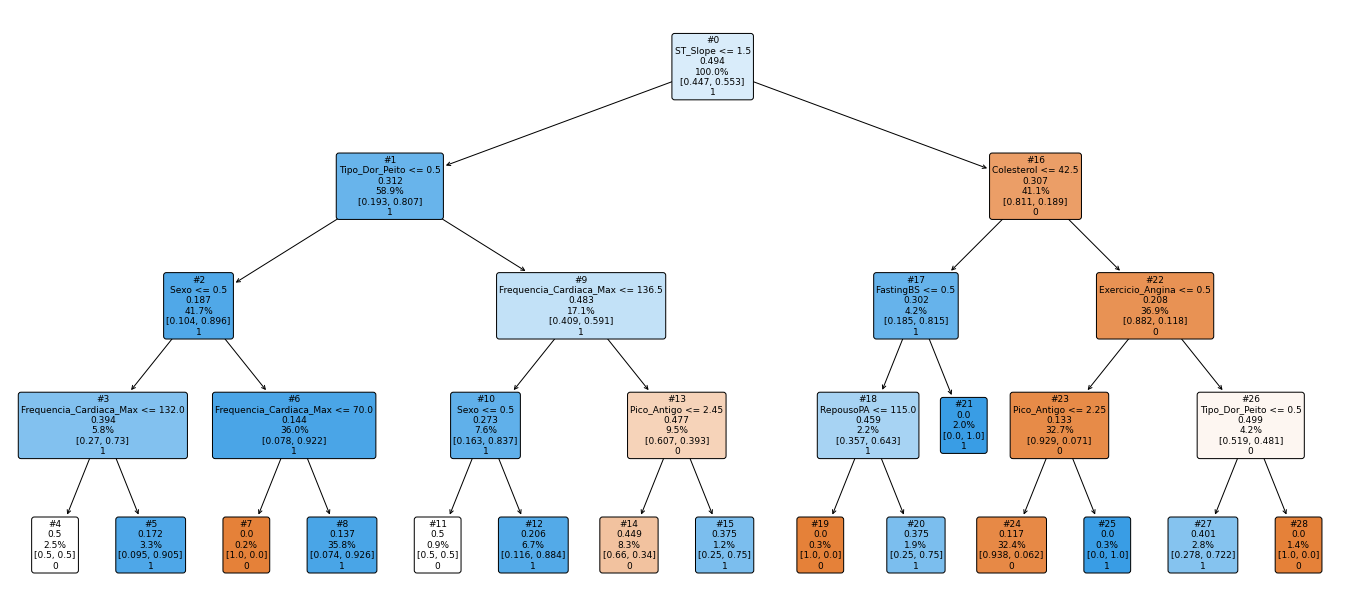

In [89]:
nome_features = X_test.columns

plt.figure(figsize=(24,11))

plt.title('teste')
tree.plot_tree(model, label=None, node_ids=True, rounded=True, fontsize=9, feature_names=nome_features, filled=True, class_names=['0','1'], proportion=True)
# plt.savefig('decision_tree.png', format='png')
plt.show()

In [90]:
accuracy = accuracy_score(y_test, prediction_tree)
print('Valor Acuracia: ',accuracy)
print(classification_report(y_test, prediction_tree))

Valor Acuracia:  0.8188405797101449
              precision    recall  f1-score   support

           0       0.77      0.85      0.81       123
           1       0.87      0.79      0.83       153

    accuracy                           0.82       276
   macro avg       0.82      0.82      0.82       276
weighted avg       0.82      0.82      0.82       276



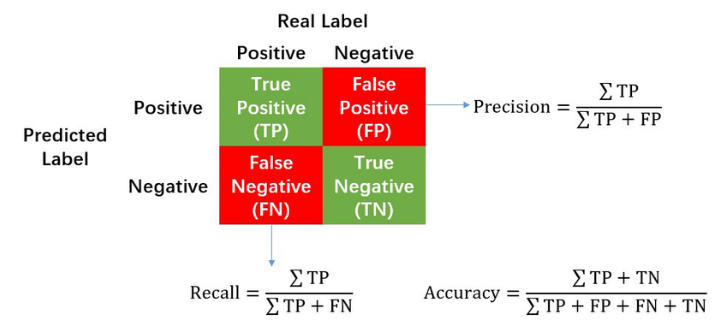

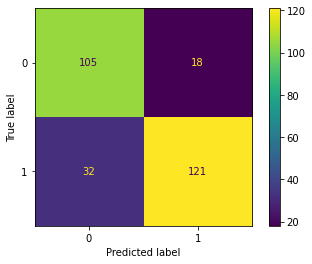

In [91]:
cm = confusion_matrix(y_test, prediction_tree)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Randon Forest Train
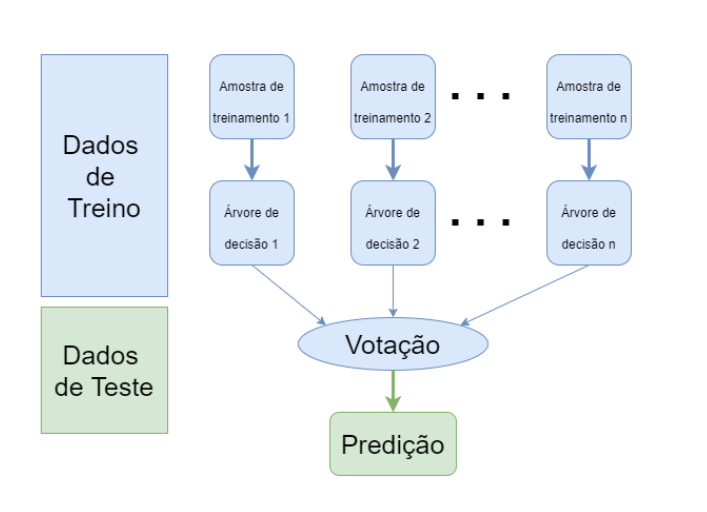

In [92]:
SEED=42
randon_forest_train = RandomForestClassifier(max_depth= 5, random_state = SEED)

In [93]:
model_rando_forest = randon_forest_train.fit(X_train, y_train)
prediction_rf_train = randon_forest_train.predict(X_train)

accuracy = accuracy_score(y_train, prediction_rf_train)
print('Valor Acuracia: ',accuracy)
print(classification_report(y_train, prediction_rf_train))

Valor Acuracia:  0.9080996884735203
              precision    recall  f1-score   support

           0       0.93      0.86      0.89       287
           1       0.90      0.94      0.92       355

    accuracy                           0.91       642
   macro avg       0.91      0.90      0.91       642
weighted avg       0.91      0.91      0.91       642



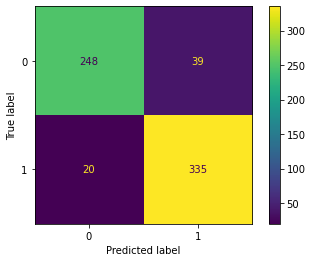

In [94]:
cm = confusion_matrix(y_train, prediction_rf_train)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Randon Rorest Train

In [95]:
prediction_rf = model_rando_forest.predict(X_test)

accuracy = accuracy_score(y_test, prediction_rf)
print('Valor Acuracia: ',accuracy)
print(classification_report(y_test, prediction_rf))

Valor Acuracia:  0.855072463768116
              precision    recall  f1-score   support

           0       0.83      0.85      0.84       123
           1       0.87      0.86      0.87       153

    accuracy                           0.86       276
   macro avg       0.85      0.85      0.85       276
weighted avg       0.86      0.86      0.86       276



- Matrix Confusão Randon Forest

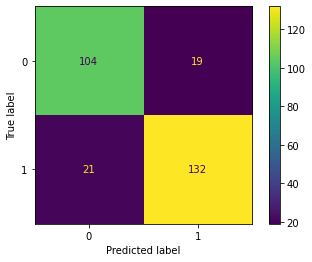

In [96]:
cm = confusion_matrix(y_test, prediction_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Logistic Regression Train

In [97]:
lr = LogisticRegression(max_iter = 1000 ,random_state = 0)

In [98]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=0)

In [99]:
y_preds = lr.predict(X_train)

In [100]:
y_accuracy = accuracy_score(y_train, y_preds)
print("Acurácia:", y_accuracy)

print(classification_report(y_train, y_preds))

Acurácia: 0.8535825545171339
              precision    recall  f1-score   support

           0       0.85      0.82      0.83       287
           1       0.86      0.88      0.87       355

    accuracy                           0.85       642
   macro avg       0.85      0.85      0.85       642
weighted avg       0.85      0.85      0.85       642



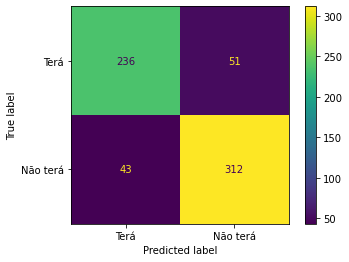

In [101]:
cm = confusion_matrix(y_train, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Terá", "Não terá"])
disp.plot()

# GaussianNB Train

In [102]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_preds = gnb.predict(X_train)

In [103]:
y_accuracy = accuracy_score(y_train, y_preds)
print("Acurácia:", y_accuracy)

print(classification_report(y_train, y_preds))

Acurácia: 0.8629283489096573
              precision    recall  f1-score   support

           0       0.84      0.85      0.85       287
           1       0.88      0.87      0.88       355

    accuracy                           0.86       642
   macro avg       0.86      0.86      0.86       642
weighted avg       0.86      0.86      0.86       642



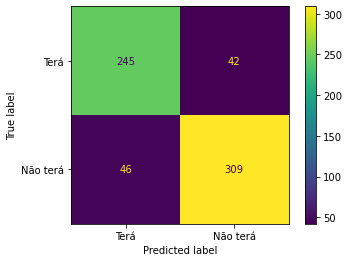

In [104]:
cm = confusion_matrix(y_train, y_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Terá", "Não terá"])
disp.plot()

# Cross-Validation

A escolha da validação cruzada correta depende do conjunto de dados com o qual você está lidando, e a escolha da validação cruzada em um conjunto de dados pode ou não se aplicar a outros conjuntos de dados. No entanto, existem alguns tipos de técnicas de validação cruzada que são as mais populares e amplamente utilizadas. Esses incluem:

- validação cruzada k-fold
- validação cruzada estratificada em k-fold A validação cruzada é dividir os dados de treinamento em algumas partes. Treinamos o modelo em algumas dessas peças e testamos nas demais

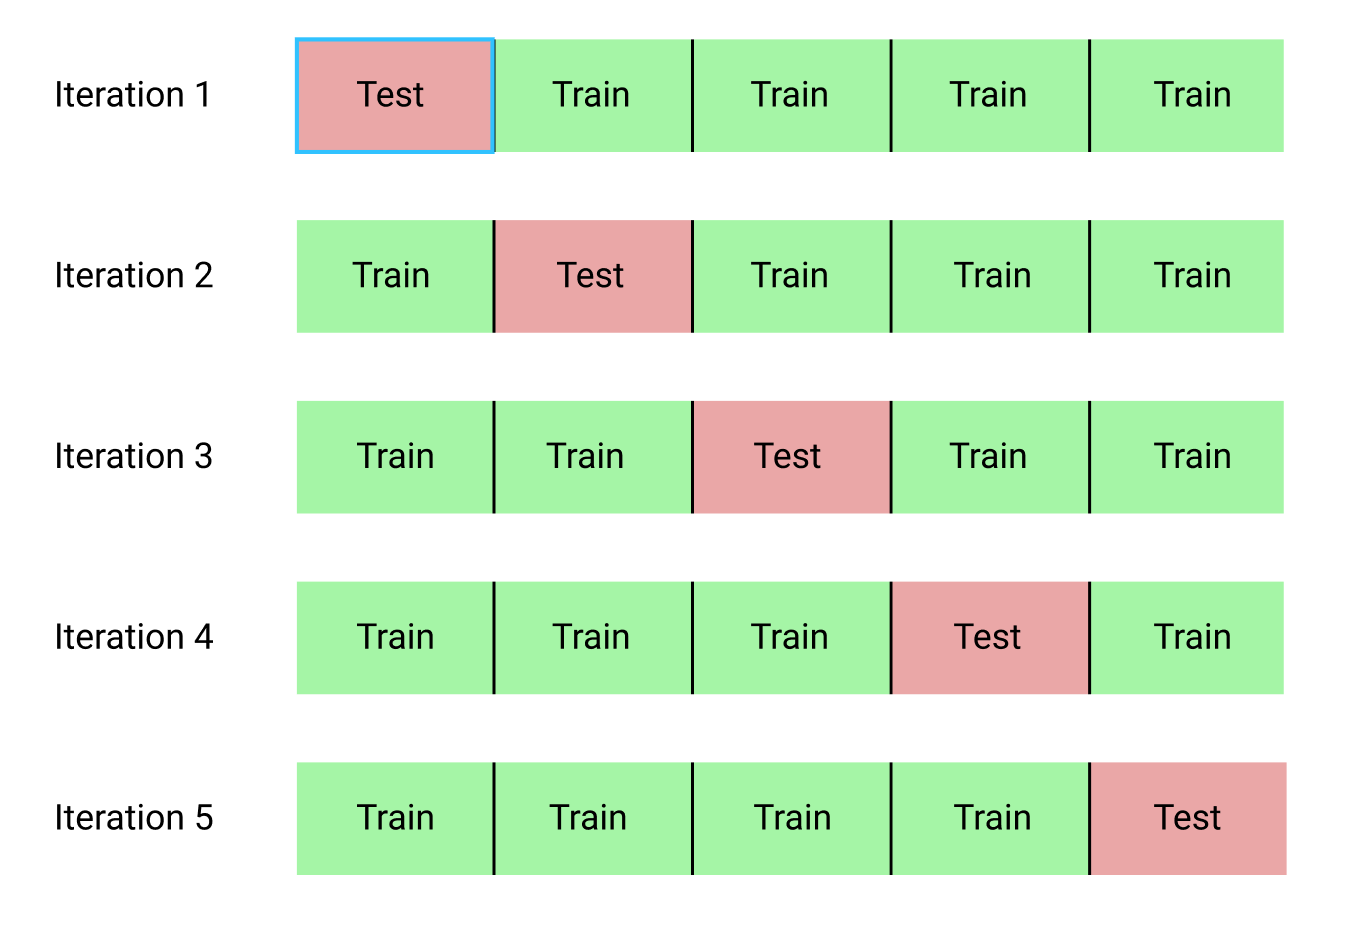



## Criação de objeto de classificadores

In [105]:
classifiers = {'Arvore': DecisionTreeClassifier(random_state=0, max_depth=4),
               'Rando Forest': RandomForestClassifier(max_depth= 5, random_state = SEED),
               'Naive Bayes': GaussianNB(),
               'Regressão Logistica': LogisticRegression(max_iter = 1000 ,random_state = 0),
               'Gaussian': GaussianNB()
              }

In [106]:
for c in X_train.columns:
    if X_train[c].dtype == "object":
        X_train[c] = X_train[c].astype('category')
        X_train[c] = X_train[c].cat.codes

In [115]:
for clf in classifiers.items():
    clf[1].fit(X_train, y_train)
    preds = clf[1].predict(X_test)
    score = accuracy_score(preds, y_test)
    print(f'\n------{clf[0]}------')
    print("Acurácia:",accuracy_score(y_test, preds))
    print("Precisão:",precision_score(y_test, preds))
    print("Recall:",recall_score(y_test, preds))
    print("F1:",f1_score(y_test, preds))


------Arvore------
Acurácia: 0.8188405797101449
Precisão: 0.8705035971223022
Recall: 0.7908496732026143
F1: 0.8287671232876712

------Rando Forest------
Acurácia: 0.855072463768116
Precisão: 0.8741721854304636
Recall: 0.8627450980392157
F1: 0.868421052631579

------Naive Bayes------
Acurácia: 0.822463768115942
Precisão: 0.8714285714285714
Recall: 0.7973856209150327
F1: 0.832764505119454

------Regressão Logistica------
Acurácia: 0.855072463768116
Precisão: 0.900709219858156
Recall: 0.8300653594771242
F1: 0.8639455782312925

------Gaussian------
Acurácia: 0.822463768115942
Precisão: 0.8714285714285714
Recall: 0.7973856209150327
F1: 0.832764505119454


In [116]:
preds = []
clf_trained = []
for clf in classifiers.items():
    clf_atual = clf[1].fit(X_train, y_train)
    clf_trained.append(clf_atual)

    pred_atual=clf[1].predict(X_test)
    preds.append(pred_atual)

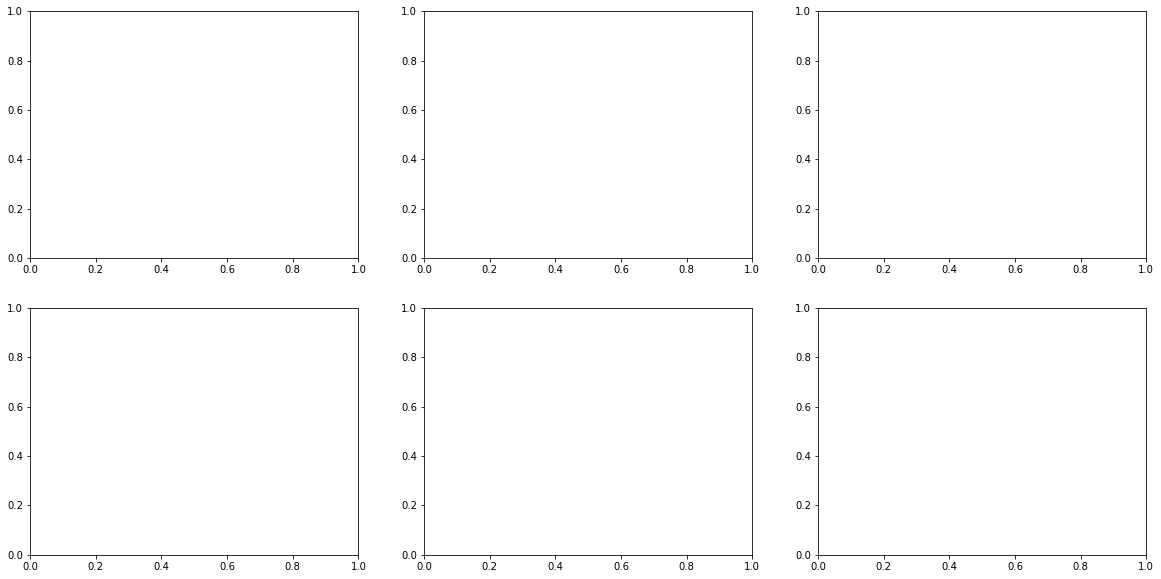

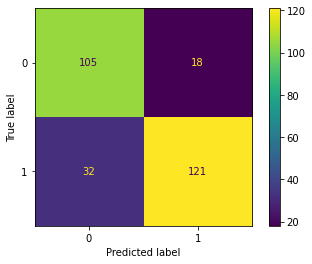

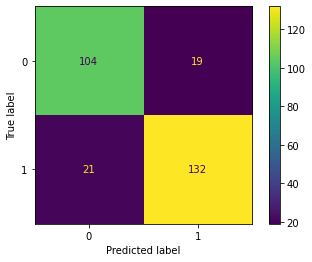

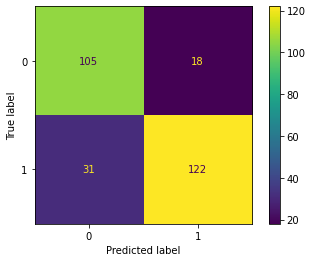

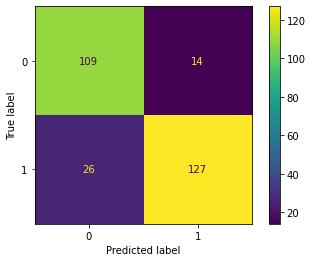

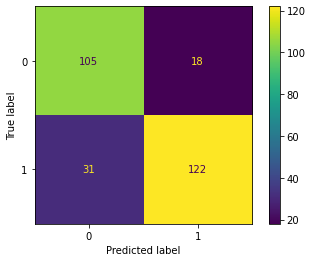

In [121]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
for i in range(len(classifiers)):
    cm = confusion_matrix(y_test, preds[i], labels=clf_trained[i].classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_trained[i].classes_)
    disp.plot()
